In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [2]:
dataset = pd.read_csv('SaratogaHouses.csv')

In [3]:
livingArea = dataset['livingArea'].values
landValue = dataset['landValue'].values
price = dataset['price'].values

In [4]:
from sklearn.preprocessing import StandardScaler

In [5]:
n = len(price)
X0 = np.ones(n)
X = np.array([X0, livingArea, landValue]).T
y = np.array(price)
B = np.zeros(3)

In [12]:
sc = StandardScaler()
X = sc.fit_transform(X)
y = y.reshape(y.shape[0],1)
y = sc.fit_transform(y)

C:\Users\asus\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [13]:
def cost_function(X,y,B):
    h = np.sum((X.dot(B) - y) ** 2) / (2 * n)
    return h

In [14]:
cost_function(X,y,B)

864.00000000000011

In [15]:
def gradient_descent(X,y,B,epoch,alpha):
    cost_history = [0] * epoch
    
    for i in range(epoch):
        y_pred = X.dot(B)
        loss = y_pred - y
        gradient = X.T.dot(loss) / n
        B = B - alpha * gradient
        cost_history[i] = cost_function(X,y,B)
        print(i, cost_history[i])
    
    return cost_history, B

In [39]:
cost, weights = gradient_descent(X,y.flatten(),B,epoch=200,alpha=0.001)

0 27299310120.5
1 27291151560.1
2 27283016068.9
3 27274903581.5
4 27266814032.6
5 27258747357.1
6 27250703490.0
7 27242682366.8
8 27234683922.8
9 27226708093.6
10 27218754815.1
11 27210824023.4
12 27202915654.5
13 27195029644.8
14 27187165931.0
15 27179324449.8
16 27171505137.9
17 27163707932.7
18 27155932771.2
19 27148179591.0
20 27140448329.7
21 27132738925.1
22 27125051315.1
23 27117385438.0
24 27109741232.0
25 27102118635.7
26 27094517587.7
27 27086938027.0
28 27079379892.4
29 27071843123.3
30 27064327659.0
31 27056833439.1
32 27049360403.3
33 27041908491.4
34 27034477643.5
35 27027067799.9
36 27019678901.0
37 27012310887.2
38 27004963699.5
39 26997637278.7
40 26990331565.8
41 26983046502.1
42 26975782029.0
43 26968538088.2
44 26961314621.2
45 26954111570.1
46 26946928877.0
47 26939766484.0
48 26932624333.5
49 26925502368.2
50 26918400530.7
51 26911318764.0
52 26904257011.1
53 26897215215.2
54 26890193319.7
55 26883191268.2
56 26876209004.3
57 26869246471.9
58 26862303615.0
59 2685

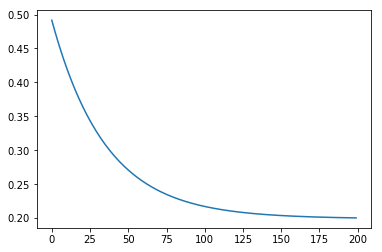

In [21]:
cost_x = [i for i in range(200)]
plt.plot(cost_x, cost)

In [22]:
cost[-1]

0.20030648830078465

In [30]:
y_pred = X.dot(weights)

In [31]:
y_pred = sc.inverse_transform(y_pred)

In [32]:
y_pred[0]

158903.10740402876

In [33]:
y = sc.inverse_transform(y)

In [34]:
y[0]

array([ 132500.])

In [35]:
y[0] - y_pred[0]

array([-26403.10740403])

In [36]:
from sklearn.metrics import mean_squared_error

In [38]:
np.sqrt(mean_squared_error(y_pred, y))

62289.457422760963